### Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

In [3]:
import time
import math
import secrets
import numpy as np
import matplotlib.pyplot as plt


from sympy.ntheory import factorint

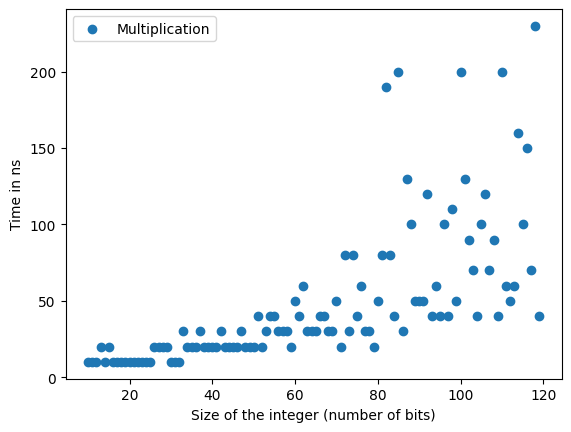

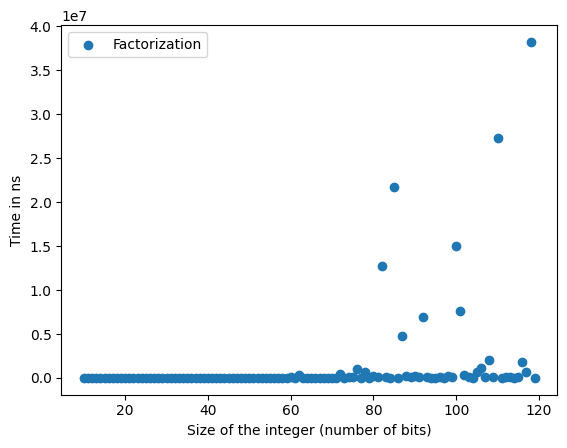

In [4]:
def factorize_and_multiply_back(num_of_bits: int) -> tuple:
    # Generate number.
    number = secrets.randbits(num_of_bits)

    # Factorization.
    start_time = time.time_ns()
    primes = factorint(number)
    duration_f = round((time.time_ns() - start_time), 2)

    # Multiplication.
    primes = [prime for prime, times in primes.items() for _ in range(times)]
    start_time = time.time_ns()
    math.prod(primes)
    duration_p = round((time.time_ns() - start_time), 2)

    return duration_f, duration_p

# Execute the functions and measure the times.
outcomes = []
for n in range(10, 120):
    ft, mt = 0, 0
    for _ in range(10): # Execute 5 times the same number of bits for better (more dense) results
        f, m = factorize_and_multiply_back(n)
        ft += f
        mt += m
    outcomes.append((n, f/10, m/10)) # Calcualte average times (try to reduce the impact of outliers)
bits, fact_times, mult_times = zip(*outcomes)

# Plot the multiplication times.
plt.scatter(bits, mult_times, label="Multiplication")
plt.xlabel("Size of the integer (number of bits)")
plt.ylabel("Time in ns")
plt.legend(loc="upper left")
plt.show()

# Plot the factorization times.
plt.scatter(bits, fact_times, label="Factorization")
plt.xlabel("Size of the integer (number of bits)")
plt.ylabel("Time in ns")
plt.legend(loc="upper left")
plt.show()

#### Observations

* Time complexity of multiplication operation is definitely **linear**.
* Time complexity of factorization is probably **exponential** (although it is hard to be positively determined by this plot due to the randomness factor in the number generation). But the interpolated function would probably look exponential. :) <br>


NB: Unfortunately, I wasn't able to produce a meaningful interpolation function by using `Polynomial.fit()`. Probably the function is not polynomial or maybe we need to first eliminate the outliers in the data points.